In [17]:
R.version.string
print("email: 'Maciek Sykulski'<macieksk@gmail.com>")
length(ls())
getwd()

[1] "R version 3.5.1 (2018-07-02)"

[1] "email: 'Maciek Sykulski'<macieksk@gmail.com>"


[1] 26

[1] "/home/hackyeah/hackyeah2018/shiny-examples/063-superzip-example"

In [4]:
projDir<-"/home/hackyeah/hackyeah2018"
projectPrefix<-"R_Shiny_runApp"

#
load.sources<-function(){
    for (f in  c("utils.R" #Contains inpar, save_new_image, etc
                 #...  
                 ) 
        ){
    source(paste(projDir,"/src/",f,sep=""))
   }
}
load.sources()

hash-2.2.6 provided by Decision Patterns

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite


In [5]:
#system.time(load(paste(projDir,"/r_saved_images/",projectPrefix,".Rdata",sep="")))
lsos()
gc()

,Type,Size,Rows,Columns
load.sources,function,25744,NA,NA
cpar,function,9000,NA,NA
read.table.into.db,function,7328,NA,NA
db.info,function,6280,NA,NA
safe_command_run,function,5600,NA,NA
multiloop,function,5376,NA,NA
postscript.call,function,4936,NA,NA
add.records.to.table,function,4792,NA,NA
save_new_image,function,4696,NA,NA
pdf.call,function,4600,NA,NA


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,676019,36.2,1167574,62.4,1167574,62.4
Vcells,1264525,9.7,8388608,64.0,1943643,14.9


In [5]:
gc()
#system.time(save_new_image())

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,644071,34.4,1168576,62.5,940480,50.3
Vcells,1097677,8.4,1916127,14.7,1410773,10.8


[1] "/home/hackyeah/hackyeah2018/r_saved_images/R_Shiny_runApp_2018-11-25_00_16_02.Rdata"


   user  system elapsed 
  0.008   0.000   0.009 

In [7]:
library(lattice)
library(latticeExtra)
library(ggplot2)
library(gplots)
#library(png)

#library(Hmisc)
library(cluster)
library(MASS)
library(reshape)

#library(lumi)
#library(lumiHumanIDMapping)
#library(lumiHumanAll.db)
#library(limma)

#library(annotate)
#library(GOstats)

#library(multtest)
library(matrixStats)
#library(extrafont)
#library(enrichvs)
#library(statmod)
#library(flexmix)


library(shiny)
library(rPython)

load.sources()

sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Debian GNU/Linux buster/sid

Matrix products: default
BLAS: /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] rPython_0.0-6       RJSONIO_1.3-1.1     shiny_1.2.0        
 [4] matrixStats_0.54.0  reshape_0.8.8       MASS_7.3-51.1      
 [7] cluster_2.0.7-1     gplots_3.0.1        ggplot2_3.1.0      
[10] latticeExtra_0.6-28 RColorBrewer_1.1-2  lattice_0

In [12]:
getwd()

[1] "/home/hackyeah/hackyeah2018/shiny-examples/063-superzip-example"

In [32]:
library(rgdal)
setwd(projDir)
ogrListLayers(dsn="geo_data/POWIATY.shp")
powiatyOGR <- readOGR("geo_data/POWIATY.shp",encoding="UTF-8") 
proj4string(powiatyOGR) <- CRS("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
powiatyOGR$NAZWA<-as.character(powiatyOGR$NAZWA)

[1] "POWIATY"
attr(,"driver")
[1] "ESRI Shapefile"
attr(,"nlayers")
[1] 1

OGR data source with driver: ESRI Shapefile 
Source: "/home/hackyeah/hackyeah2018/geo_data/POWIATY.shp", layer: "POWIATY"
with 380 features
It has 1 fields


In [73]:
zgonyCSV <- read.csv(paste0(projDir,"/bdl_data/zgony.csv"),header=TRUE, sep=",")
names(zgonyCSV)<-c("powiat","nowotwory","cukrzyca","zawal.serca","niewyd.ukl.oddech.")

In [85]:
## Fixing powiatyOGR names

wrong.ids<-which(!(tolower(powiatyOGR$NAZWA) %in% tolower(zgonyCSV$powiat)))
wrong.ids
powiatyOGR$NAZWA[wrong.ids]
zgonyCSV$powiat[!(tolower(zgonyCSV$powiat) %in% tolower(powiatyOGR$NAZWA))]
powiatyOGR$NAZWA[30]<-"bielski (podlaskie)"
powiatyOGR$NAZWA[30]
powiatyOGR$NAZWA[31]<-"bielski (śląskie)"
powiatyOGR$NAZWA[31]
powiatyOGR$NAZWA[77]<-"grodziski (mazowieckie)"
powiatyOGR$NAZWA[77]
powiatyOGR$NAZWA[78]<-"grodziski (wielkopolskie)"
powiatyOGR$NAZWA[78]
powiatyOGR$NAZWA[120]<-"krośnieński (lubuskie)"
powiatyOGR$NAZWA[120]
powiatyOGR$NAZWA[121]<-"krośnieński (podkarpackie)"
powiatyOGR$NAZWA[121]
powiatyOGR$NAZWA[135]<-"brzeski (małopolskie)"
powiatyOGR$NAZWA[136]<-"brzeski (opolskie)"

powiatyOGR$NAZWA[194]<-"tomaszowski (lubelskie)"
powiatyOGR$NAZWA[195]<-"tomaszowski (łódzkie)"


powiatyOGR$NAZWA[332]<-"opolski (lubelskie)"
powiatyOGR$NAZWA[333]<-"opolski"

powiatyOGR$NAZWA[212]<-"włocławski" # Miasto Włocławek to włocławski on the map

powiatyOGR$NAZWA[280]<-"świdnicki (lubelskie)"
powiatyOGR$NAZWA[372]<-"świdnicki (dolnośląskie)"

powiatyOGR$NAZWA[336]<-"ostrowski (mazowieckie)"
powiatyOGR$NAZWA[337]<-"ostrowski (wielkopolskie)"

powiatyOGR$NAZWA[369]<-"średzki (dolnośląskie)"
powiatyOGR$NAZWA[370]<-"średzki (wielkopolskie)"

grep("nowodwo",tolower(powiatyOGR$NAZWA))
powiatyOGR$NAZWA[315]<-"nowodworski" #"nowodworski (mazowieckie)"
powiatyOGR$NAZWA[316]<-"nowodworski (pomorskie)"
#powiatyOGR@polygons[316][[1]]@labpt[2:1]

#powiatyOGR@polygons[370][[1]]@labpt[2:1]

integer(0)

character(0)

factor(0)
378 Levels: aleksandrowski augustowski bartoszycki będziński ... żywiecki

[1] "bielski (podlaskie)"

[1] "bielski (śląskie)"

[1] "grodziski (mazowieckie)"

[1] "grodziski (wielkopolskie)"

[1] "krośnieński (lubuskie)"

[1] "krośnieński (podkarpackie)"

[1] 315 316

In [131]:
summary(match(tolower(zgonyCSV$powiat),tolower(powiatyOGR$NAZWA)))
sum(duplicated(match(tolower(zgonyCSV$powiat),tolower(powiatyOGR$NAZWA))))
#zgonyCSV$powiat[duplicated(match(tolower(zgonyCSV$powiat),tolower(powiatyOGR$NAZWA)))]

which(is.na(match(tolower(powiatyOGR$NAZWA),tolower(zgonyCSV$powiat))))
sum(duplicated(match(tolower(powiatyOGR$NAZWA),tolower(zgonyCSV$powiat))))
powiatyData<-zgonyCSV[match(tolower(powiatyOGR$NAZWA),tolower(zgonyCSV$powiat)),]
#zgonyCSV[match(tolower(zgonyCSV$powiat),tolower(powiatyOGR$NAZWA)),]

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    95.5   190.0   190.4   285.5   380.0 

[1] 1

[1] 316

[1] 1

In [132]:
populacjaCSV<-read.csv(paste0(projDir,"/bdl_data/NARO_3304_CTAB_20181124191233.csv"),header=TRUE,sep=",")
head(populacjaCSV)
tolowerNS<-function(s)gsub(" ","",tolower(s))

#sort(tolowerNS(powiatyOGR$NAZWA)),
#sort(tolowerNS(populacjaCSV$Nazwa))

populacjaCSV$Nazwa.fix<-sapply(sapply(populacjaCSV$Nazwa, #[which(grepl("Powiat",populacjaCSV$Nazwa))], 
                                      function(x) substring(x, 8)), function(y) ifelse(substring(y,1,2)=="m.", 
                                                                                paste("m. ", substring(y,3)),y))

populacjaCSV$Nazwa.fix[grep("opolski \\(opolskie\\)",populacjaCSV$Nazwa.fix)]<-"opolski"
populacjaCSV$Nazwa.fix[grep("nowodworski \\(mazowieckie\\)",populacjaCSV$Nazwa.fix)]<-"nowodworski"                                          

Kod,Nazwa,ogółem,ogółem.1,X2011,X.osoba.,ogółem.2,X0.4,X2011.1,X.osoba..1,⋯,X2011.57,X.osoba..57,kobiety.18,X85.89.2,X2011.58,X.osoba..58,kobiety.19,X90.i.więcej.2,X2011.59,X.osoba..59
0,POLSKA,38511824,2057998,1802395,1971817,2392972,2830606,3264326,3129306,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
200000,DOLNOŚLĄSKIE,2915241,147982,124720,135567,167153,208238,253363,245101,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
201000,Powiat bolesławiecki,90470,4878,4312,4716,5622,6699,7611,7414,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
201011,Bolesławiec (1),40209,1856,1679,1722,2048,2563,3227,3313,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
201022,Bolesławiec (2),13594,793,664,831,1020,1106,1088,1073,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
201032,Gromadka (2),5523,269,245,334,411,456,460,410,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [133]:
which(is.na(match(tolowerNS(powiatyOGR$NAZWA),tolowerNS(populacjaCSV$Nazwa.fix))))
powiatyOGR$NAZWA[which(is.na(match(tolowerNS(powiatyOGR$NAZWA),tolowerNS(populacjaCSV$Nazwa.fix))))]
sum(duplicated(match(tolowerNS(powiatyOGR$NAZWA),tolowerNS(populacjaCSV$Nazwa.fix))))
powiatyOGR$NAZWA[duplicated(match(tolowerNS(powiatyOGR$NAZWA),tolowerNS(populacjaCSV$Nazwa.fix)))]
populacjaData<-populacjaCSV[match(tolowerNS(powiatyOGR$NAZWA),tolowerNS(populacjaCSV$Nazwa.fix)),]
dim(populacjaData)
dim(powiatyData)

integer(0)

character(0)

[1] 1

[1] "włocławski"

[1] 380 243

[1] 380   5

In [134]:
head(populacjaData[,c("Nazwa","ogółem")])

,Nazwa,ogółem
823,Powiat m.Biała Podlaska,58009
2591,Powiat m.Białystok,293998
2985,Powiat m.Bielsko-Biała,174534
337,Powiat bydgoski,106359
2598,Powiat bytowski,78144
350,Powiat chełmiński,52707


In [135]:
for (cn in colnames(powiatyData)[2:NCOL(powiatyData)]) {
    powiatyData<-cbind(powiatyData,newcol=powiatyData[,cn]/populacjaData$ogółem)
    colnames(powiatyData)[NCOL(powiatyData)]<-paste0(cn,".pop.norm")
}
    

In [136]:
head(powiatyData)

,powiat,nowotwory,cukrzyca,zawal.serca,niewyd.ukl.oddech.,nowotwory.pop.norm,cukrzyca.pop.norm,zawal.serca.pop.norm,niewyd.ukl.oddech..pop.norm
125,m. biała Podlaska,109,10,21,33,0.001879019,1.723870e-04,0.0003620128,0.0005688772
126,m. białystok,580,36,107,107,0.001972803,1.224498e-04,0.0003639481,0.0003639481
127,m. bielsko-Biała,462,52,103,46,0.002647049,2.979362e-04,0.0005901429,0.0002635590
23,bydgoski,228,8,46,61,0.002143683,7.521695e-05,0.0004324975,0.0005735293
24,bytowski,182,70,24,33,0.002329034,8.957821e-04,0.0003071253,0.0004222973
26,chełmiński,142,4,15,34,0.002694139,7.589125e-05,0.0002845922,0.0006450756


In [144]:
latLng<-as.data.frame(t(sapply(1:length(powiatyOGR$NAZWA),function(powiati){
    selPols<-powiatyOGR@polygons[powiati]
    if (length(selPols)>=1) {         
        return(selPols[[1]]@labpt)
    }
}))[,2:1])
colnames(latLng)<-c("Lat","Long")
powiatyDataLatLng<-cbind(powiatyData[,1,drop=FALSE],Action=NA,latLng,populacja=populacjaData$ogółem,powiatyData[,2:NCOL(powiatyData)])


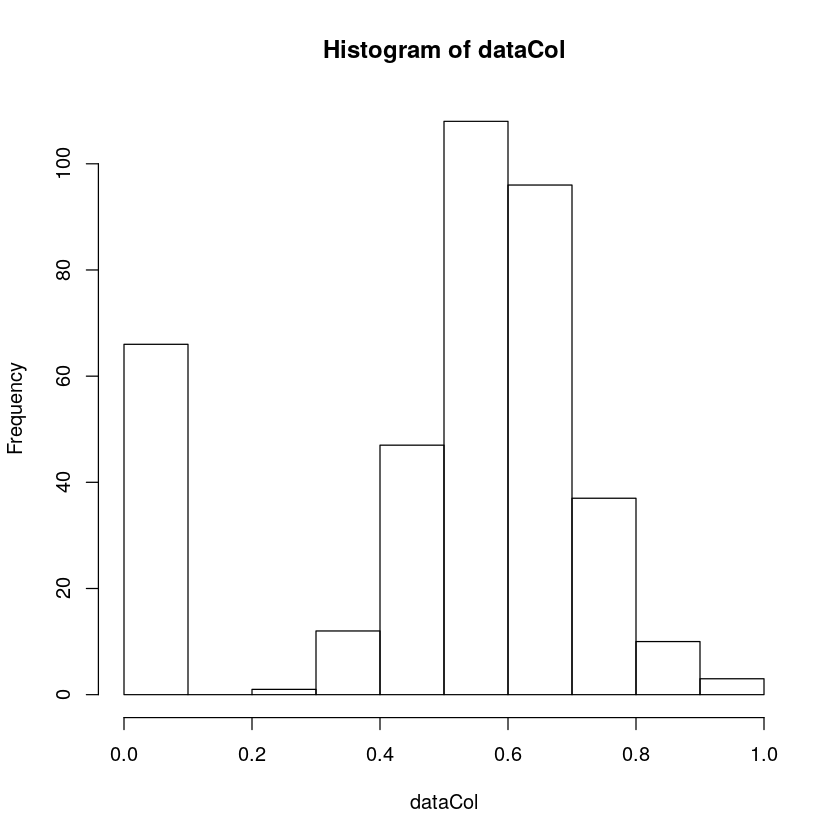

In [125]:
dataCol=powiatyData[,6]
     mnDC<-min(dataCol,na.rm=TRUE)
     mxDC<-max(dataCol,na.rm=TRUE)
     dataCol<-(dataCol-mnDC)/max(0.000000001,mxDC-mnDC)
     dataCol<-0.3+dataCol*0.7
     dataCol[is.na(dataCol)]<-0
hist(dataCol)

In [34]:
selectedRegion<-FALSE

In [ ]:
setwd(paste0(projDir,"/shiny-examples/063-superzip-example/"))

#ui = bootstrapPage(
#  sliderInput('x', 'Set x', 0, 10, 5),
#  verbatimTextOutput('out1')
#)
#rm(ui)

#server = function(input, output, session){
#  output$out1 <- renderPrint({
#    python.call("len", 1:input$x)
#  })
#}
#rm(server)

library(shiny)
#library(rPython)


runApp(port = 23401)


Listening on http://127.0.0.1:23401


[1] "input$dane 2"
[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.6

[1] "input$dane 2"
[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.6

[1] "input$dane 8"
[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.6

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] "input$dane 5"
[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.6

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

Warning message:
“Error in filter_impl: Evaluation error: object 'Score' not found.”

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

Warning message:
“Error in filter_impl: Evaluation error: object 'Score' not found.”

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

Warning message in readLines(path):
“incomplete final line found on '/home/hackyeah/hackyeah2018/shiny-examples/063-superzip-example/server.R'”Possible missing comma at:
128:    leafletProxy("map") %>% addPopups(lng, lat, content, layerId = zipcode)
        ^
Possible unmatched '}' at:
129:  }
      ^
Possible missing comma at:
141:  showLatLng <- function(lat,lng) {
      ^
Possible missing comma at:
162:  observe({
      ^
Possible missing comma at:
174:  observe({
      ^
Possible missing comma at:
188:  observe({
      ^
Possible missing comma at:
206:  printTest<-function(s){
      ^
Possible missing comma at:
218:     for (powiati in 1:length(powiatyOGR$NAZWA)) {
                      ^
Possible missing comma at:
218:     for (powiati in 1:length(powiatyOGR$NAZWA)) {
                         ^
Possible missing comma at:
338:  defaultRegionPolVals<-list(color = "#444444", weight = 1, smoothFactor = 0.5)
      ^
Possible missing comma at:
340:  prepareMap<-function() {
      ^
Poss

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

Warning message:
“Error in evalAll: object 'zipcode' not found”

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

Warning message in readLines(path):
“incomplete final line found on '/home/hackyeah/hackyeah2018/shiny-examples/063-superzip-example/server.R'”Possible missing comma at:
118:    cnames[idx]<-NA
        ^
Possible missing comma at:
119:    content <- as.character(
        ^
Possible extra comma at:
127:      lapply(,function(cn){
                 ^
Possible unmatched ')' at:
129:           sprintf("%s: %s", cn, cleantable[zipcode,cn]))
                                                            ^
Possible unmatched '}' at:
130:          }
              ^
Possible missing comma at:
224:     for (powiati in 1:length(powiatyOGR$NAZWA)) {
                      ^
Possible missing comma at:
224:     for (powiati in 1:length(powiatyOGR$NAZWA)) {
                         ^
Warning message:
“Error in sourceUTF8: Error sourcing /home/hackyeah/hackyeah2018/shiny-examples/063-superzip-example/server.R”  [No stack trace available]


[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

Warning message:
“Error in rep: invalid 'times' argument”

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

[1] 23.14210 52.03004
[1] 23.15880 53.13226
[1] 19.03878 49.81292
[1] 18.01435 53.19181
[1] 17.32305 54.14124
[1] 18.51693 53.30111
[1] 23.50290 51.12871
[1] 16.99182 52.96498
[1] 17.68659 53.80964
[1] 15.58210 53.13832
[1] 19.44312 50.11347
[1] 20.60661 52.85802
[1] 18.80259 49.73929
[1] 16.36711 52.91218
[1] 19.7896 50.8081
[1] 17.16893 53.72887
[1] 21.00739 50.23194
[1] 21.35251 50.01175
[1] 15.99288 53.47322
[1] 20.02269 53.27024
[1] 18.73214 52.79804
[1] 23.10878 53.81416
[1] 20.75771 54.24771
[1] 19.24746 51.36008
[1] 19.35074 50.29180
[1] 23.20882 51.97525
[1] 20.95393 51.62115
[1] 16.05981 53.97590
[1] 23.23416 53.10016
[1] 23.0565 52.7481
[1] 18.91093 49.76127
[1] 20.95981 52.44823
[1] 16.56854 51.87097
[1] 22.41905 50.26875
[1] 17.68854 54.58050
[1] 20.40775 54.11361
[1] 20.28543 49.67863
[1] 19.23729 52.81458
[1] 21.58198 51.15607
[1] 23.16528 50.20751
[1] 15.27944 51.07649
[1] 22.56006 51.51445
[1] 22.49305 51.13829
[1] 16.28145 51.42093
[1] 18.77199 50.67917
[1] 15.52946 5

In [127]:
daneGlob

[1] "3"

In [68]:
powiatyOGR$NAZWA[clickGlob$id]
powiatyOGR@data[[clickGlob$id]]

[1] działdowski
370 Levels: aleksandrowski augustowski bartoszycki będziński ... żywiecki

ERROR: Error in .subset2(x, i, exact = exact): subscript out of bounds


In [55]:
selectedRegion@data

,NAZWA
351,płoński


In [56]:
selectedRegion

An object of class "SpatialPolygonsDataFrame"
Slot "data":
      NAZWA
351 płoński

Slot "polygons":
[[1]]
An object of class "Polygons"
Slot "Polygons":
[[1]]
An object of class "Polygon"
Slot "labpt":
[1] 20.35444 52.62754

Slot "area":
[1] 0.1831217

Slot "hole":
[1] FALSE

Slot "ringDir":
[1] 1

Slot "coords":
           [,1]     [,2]
  [1,] 20.38811 52.73388
  [2,] 20.40212 52.73018
  [3,] 20.42485 52.73811
  [4,] 20.42633 52.73617
  [5,] 20.44081 52.73929
  [6,] 20.44719 52.73442
  [7,] 20.46606 52.73237
  [8,] 20.47088 52.72778
  [9,] 20.47628 52.72671
 [10,] 20.47536 52.72300
 [11,] 20.47308 52.72326
 [12,] 20.47365 52.72148
 [13,] 20.47124 52.72026
 [14,] 20.47371 52.71978
 [15,] 20.47422 52.71726
 [16,] 20.48279 52.71999
 [17,] 20.48922 52.71941
 [18,] 20.49338 52.72177
 [19,] 20.50607 52.71534
 [20,] 20.49646 52.70943
 [21,] 20.50811 52.70665
 [22,] 20.51774 52.70045
 [23,] 20.51904 52.70611
 [24,] 20.52165 52.70962
 [25,] 20.53355 52.71510
 [26,] 20.53709 52.71340
 [27,] 20

In [58]:
length(selectedRegion@polygons)

[1] 1